In [1]:
# packages
import pandas as pd
import numpy as np
import math

from claspy.segmentation import BinaryClaSPSegmentation

import ruptures as rpt

import stumpy
from aeon.segmentation import find_dominant_window_sizes

from aeon.segmentation import GreedyGaussianSegmenter

from aeon.segmentation import InformationGainSegmenter

from aeon.anomaly_detection import STRAY

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer,mean_squared_error
from ruptures.metrics import precision_recall
import matplotlib.pyplot as plt
#from aeon.visualisation import plot_series_with_change_points, plot_series_with_profiles
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from claspy.tests.evaluation import f_measure,covering

from claspy.window_size import dominant_fourier_frequency, highest_autocorrelation, suss

C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\aeon\base\__init__.py:24: FutureWarning: The aeon package will soon be releasing v1.0.0 with the removal of legacy modules and interfaces such as BaseTransformer and BaseForecaster. This will contain breaking changes. See aeon-toolkit.org for more information. Set aeon.AEON_DEPRECATION_WARNING or the AEON_DEPRECATION_WARNING environmental variable to 'False' to disable this warning.
  warnings.warn(


Extracted features. Use the index of this list to use with iloc[]
<ol start="0">
  <li>Kinetic Global</li>
  <li>Kinetic Chest</li>
  <li>Directness Head</li>
  <li>Density</li>
  <li>left wrist ke</li>
  <li>right wrist ke</li>
  <li>left ankle ke</li>
  <li>right ankle ke</li>
  <li>head ke</li>
  <li>crouch density</li>
  <li>left leg density</li>
  <li>right leg density</li>
  <li>left hand density</li>
  <li>right hand density</li>
  <li>head density</li>
  <li>arto inferiore</li>
  <li>gamba</li>
  <li>coscia</li>
  <li>coscia dx</li>
  <li>coscia sx</li>
  <li>gamba sx</li>
  <li>gamba dx</li>
  <li>braccio sx</li>
  <li>braccio dx</li>
  <li>avambraccio sx</li>
  <li>avambraccio dx</li>
  <li>ARIEL speed magnitude</li>
  <li>ARIEL speed X component</li>
  <li>ARIEL speed Y component</li>
  <li>ARIEL speed Z component</li>
  <li>ARIEL acceleration magnitude</li>
  <li>ARIEL acceleration X component</li>
  <li>ARIEL acceleration Y component</li>
  <li>ARIEL acceleration Z component</li>
  <li>ARIEL jerk magnitude</li>
  <li>ARIEL jerk X component</li>
  <li>ARIEL jerk Y component</li>
  <li>ARIEL jerk Z component</li>
  <li>STRN speed magnitude</li>
  <li>STRN speed X component</li>
  <li>STRN speed Y component</li>
  <li>STRN speed Z component</li>
  <li>STRN acceleration magnitude</li>
  <li>STRN acceleration X component</li>
  <li>STRN acceleration Y component</li>
  <li>STRN accelerationZ component</li>
  <li>STRN jerk magnitude</li>
  <li>STRN jerk X component</li>
  <li>STRN jerk Y component</li>
  <li>STRN jerk Z component</li>
  <li>RHEL speed magnitude</li>
  <li>RHEL speed X component</li>
  <li>RHEL speed Y component</li>
  <li>RHEL speed Z component</li>
  <li>RHEL acceleration magnitude</li>
  <li>RHEL acceleration X component</li>
  <li>RHEL acceleration Y component</li>
  <li>RHEL acceleration Z component</li>
  <li>RHEL jerk magnitude</li>
  <li>RHEL jerk X component</li>
  <li>RHEL jerk Y component</li>
  <li>RHEL jerk Z component</li>
  <li>LHEL speed magnitude</li>
  <li>LHEL speed X component</li>
  <li>LHEL speed Y component</li>
  <li>LHEL speed Z component</li>
  <li>LHEL acceleration magnitude</li>
  <li>LHEL acceleration X component</li>
  <li>LHEL acceleration Y component</li>
  <li>LHEL acceleration Z component</li>
  <li>LHEL jerk magnitude</li>
  <li>LHEL jerk X component</li>
  <li>LHEL jerk Y component</li>
  <li>LHEL jerk Z component</li>
  <li>RPLM speed magnitude</li>
  <li>RPLM speed X component</li>
  <li>RPLM speed Y component</li>
  <li>RPLM speed Z component</li>
  <li>RPLM acceleration magnitude</li>
  <li>RPLM acceleration X component</li>
  <li>RPLM acceleration Y component</li>
  <li>RPLM acceleration Z component</li>
  <li>RPLM jerk magnitude</li>
  <li>RPLM jerk X component</li>
  <li>RPLM jerk Y component</li>
  <li>RPLM jerk Z component</li>
  <li>LPLM speed magnitude</li>
  <li>LPLM speed X component</li>
  <li>LPLM speed Y component</li>
  <li>LPLM speed Z component</li>
  <li>LPLM acceleration magnitude</li>
  <li>LPLM acceleration X component</li>
  <li>LPLM acceleration Y component</li>
  <li>LPLM acceleration Z component</li>
  <li>LPLM jerk magnitude</li>
  <li>LPLM jerk X component</li>
  <li>LPLM jerk Y component</li>
  <li>LPLM jerk Z component</li>




</ol>

In [2]:
# list of features. To access its name or its value while using iloc
features_name=[
    "kinetic_global",
    "kinetic_chest",
    "directness_head",
    "density",
    "left_wrist_ke",
    "right_wrist_ke",
    "left_ankle_ke",
    "right_ankle_ke",
    "head_ke",
    "crouch_density",
    "left_leg_density",
    "right_leg_density",
    "left_hand_density",
    "right_hand_density",
    "head_density",
    "arto_inferiore",
    "gamba",
    "coscia",
    "coscia_dx",
    "coscia_sx",
    "gamba_sx",
    "gamba_dx",
    "braccio_sx",
    "braccio_dx",
    "avambraccio_sx",
    "avambraccio_dx",
    "ARIEL_speed_magnitude",
    "ARIEL_speed_X_component",
    "ARIEL_speed_Y_component",
    "ARIEL_speed_Z_component",
    "ARIEL_acceleration_magnitude",
    "ARIEL_acceleration_X_component",
    "ARIEL_acceleration_Y_component",
    "ARIEL_acceleration_Z_component",
    "ARIEL_jerk_magnitude",
    "ARIEL_jerk_X_component",
    "ARIEL_jerk_Y_component",
    "ARIEL_jerk_Z_component",
    "STRN_speed_magnitude",
    "STRN_speed_X_component",
    "STRN_speed_Y_component",
    "STRN_speed_Z_component",
    "STRN_acceleration_magnitude",
    "STRN_acceleration_X_component",
    "STRN_acceleration_Y_component",
    "STRN_acceleration_Z_component",
    "STRN_jerk_magnitude",
    "STRN_jerk_X_component",
    "STRN_jerk_Y_component",
    "STRN_jerk_Z_component",
    "RHEL_speed_magnitude",
    "RHEL_speed_X_component",
    "RHEL_speed_Y_component",
    "RHEL_speed_Z_component",
    "RHEL_acceleration_magnitude",
    "RHEL_acceleration_X_component",
    "RHEL_acceleration_Y_component",
    "RHEL_acceleration_Z_component",
    "RHEL_jerk_magnitude",
    "RHEL_jerk_X_component",
    "RHEL_jerk_Y_component",
    "RHEL_jerk_Z_component",
    "LHEL_speed_magnitude",
    "LHEL_speed_X_component",
    "LHEL_speed_Y_component",
    "LHEL_speed_Z_component",
    "LHEL_acceleration_magnitude",
    "LHEL_acceleration_X_component",
    "LHEL_acceleration_Y_component",
    "LHEL_acceleration_Z_component",
    "LHEL_jerk_magnitude",
    "LHEL_jerk_X_component",
    "LHEL_jerk_Y_component",
    "LHEL_jerk_Z_component",
    "RPLM_speed_magnitude",
    "RPLM_speed_X_component",
    "RPLM_speed_Y_component",
    "RPLM_speed_Z_component",
    "RPLM_acceleration_magnitude",
    "RPLM_acceleration_X_component",
    "RPLM_acceleration_Y_component",
    "RPLM_acceleration_Z_component",
    "RPLM_jerk_magnitude",
    "RPLM_jerk_X_component",
    "RPLM_jerk_Y_component",
    "RPLM_jerk_Z_component",
    "LPLM_speed_magnitude",
    "LPLM_speed_X_component",
    "LPLM_speed_Y_component",
    "LPLM_speed_Z_component",
    "LPLM_acceleration_magnitude",
    "LPLM_acceleration_X_component",
    "LPLM_acceleration_Y_component",
    "LPLM_acceleration_Z_component",
    "LPLM_jerk_magnitude",
    "LPLM_jerk_X_component",
    "LPLM_jerk_Y_component",
    "LPLM_jerk_Z_component",
]

In [3]:
def f1scoremargin(ground_truth, predictions, tolerance):
    """
    Calcola l'F1 score con una finestra di tolleranza sui change points.
    
    :param ground_truth: Lista o array di change points reali
    :param predictions: Lista o array di change points predetti
    :param tolerance: La tolleranza temporale (numero di unità temporali)
    :return: precision, recall, f1-score
    """
    ground_truth = np.array(ground_truth)
    predictions = np.array(predictions)
    
    # Vettori per tracciare quali punti sono stati già associati
    matched_ground_truth = np.zeros(len(ground_truth), dtype=bool)
    matched_predictions = np.zeros(len(predictions), dtype=bool)

    mgt={key: False for key in ground_truth}
    mcp={key: False for key in predictions}
    #print(f'gt:{len(ground_truth)} - cp:{len(predictions)}')
    # True Positives (TP)
    tp = 0
    for i, gt_point in enumerate(ground_truth):
        for j, pred_point in enumerate(predictions):
            
            if not matched_predictions[j] and abs(gt_point - pred_point) <= tolerance:
                tp += 1
                matched_ground_truth[i] = True
                matched_predictions[j] = True

                mgt[gt_point] = True
                mcp[pred_point] = True
                break
            
    
    # False Positives (FP) - predizioni non corrispondenti a nessun ground truth entro la tolleranza
    fp = np.sum(~matched_predictions)
    
    # False Negatives (FN) - punti del ground truth non corrispondenti a nessuna predizione entro la tolleranza
    fn = np.sum(~matched_ground_truth)
    #print(f'tp:{tp} - fp:{fp} - fn:{fn}')
    #print(mgt)
    #print(mcp)
    # Calcolo di precision, recall e F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print(f'gt:{len(ground_truth)} cp:{len(predictions)} tp:{tp} fp:{fp} fn:{fn}')
    return precision, recall, f1, {"tp":tp, "fp":fp, "fn":fn}

In [4]:
def ReadAndPreProcess(inputDataRaw):
    # lettura
    df=pd.read_csv(inputDataRaw,sep=' ', header=None).interpolate()
    
    df=df.drop(0, axis=1)
    df=df.drop_duplicates()
    df = df.iloc[:, ::-1]
 

    return df

In [5]:
# questa funzione ritorna un dataframe del groundtruth che viene usato specificatamente per visualizzare il gt
# è soggetto a un preprocessing dei dati siccome l'ultimo groundtruth è dove termina il ts del gt
# di conseguenza per farlo corrispondere, bisogna stretcharlo
# ma ricordo di aver rifatti i dati nuovi per generare un groundtruth a fine ts, da controllare cosi che non serve stretcharlo?
def LoadingGroundTruth(df,gtraw):
    gt=pd.read_csv(gtraw,sep=' ', header=None)
    gt=gt.iloc[:,0].values
    #stretching dei dati se necessario per farlo corrispondere alla ts dei dati
    stretch_gt = np.array([])
    for idx,i in enumerate(gt):
        relpos = len(df)*i/gt[-1]
        stretch_gt = np.append(stretch_gt,relpos)

    # eliminiamo l'ultimo elemento che è stato annotato solo per delimitare la lunghezza della gt simile alla ts
    
    return stretch_gt[:-1]

In [6]:
def GetClasp2(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in feature:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        #potenziale bug.
        #se faccio unique() mi toglie il numero di cp in un punto e quando faccio majority voting mi si toglie
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [7]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp3(df,gt,known,feature, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in [feature]:
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """

        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp

In [8]:
# utilizzo CLASP 
# prende come parametro un dataframe e restituisce il clasp score
# gt e known vengono usati per usare il numero vero di cp se uguale a 1 sennò si cerca di predirlo se il modello lo permette
def GetClasp(df,gt,known, **kwargs):
    
    result=np.array([])
    eachresult = []
    eachclasp=[]
    for i in range(0,len(features_name)):
    
        ts=df.iloc[:,i]
        
        #print(ts.head())
        if known == 1:
            #print("knwon!")
            clasp = BinaryClaSPSegmentation(n_segments=len(gt), validation=None)
        else:
            #print("unknown!")
            clasp = BinaryClaSPSegmentation(**kwargs)
            
        found_cps = clasp.fit_predict(ts.values)    

        # c'è un bug con binseg dove un cp è oltre la lunghezza del ts
        # faccio un loop e se eccede cambio il valore con la len(tf)-1
        # WTF IS THIS
        """
        for i in range(0,len(found_cps)):
            if found_cps[i] >= len(ts):
                found_cps[i] = len(ts)-1
        """
        # per ogni array di cp di ogni singola feature
        # li unisco in un unico array. in pratica faccio un OR di tutti i cp
        result = np.sort(np.append(result,found_cps).flatten())
        result = np.unique(result)
        eachresult.append(found_cps)
        eachclasp.append(clasp)
        
        

        
    return result, eachresult, eachclasp
        
    


In [89]:
def PlotResult(df,gt,cp, nomeFile, margin,clasplist):
    #da testare quando ho piu valori
    #clasp.plot(gt_cps=gt.astype(int), heading="Segmentation of different umpire cricket signals", ts_name="ACC", file_path="segmentation_example.png")
    rplm=[0,1,2,3,5,6,7,8,9,10,13,14,15]
    plt.figure(figsize=(18,9))
    plt.plot(np.arange(len(df.iloc[:,3].values)),df.iloc[:,3].values,'blue',linewidth=0.5)

    for idx,i in enumerate(gt.astype(int)):
    
        if idx in rplm:
            plt.axvline(x = i, color = 'green',linewidth=1) 
        else:
            plt.axvline(x = i, color = 'green',linewidth=3,linestyle="-.",alpha=.5) 
            
    for j in cp.tolist():
        plt.axvline(x = j, color = 'red',linewidth=1,linestyle="-.") 

    for k in gt.astype(int):
        plt.fill_betweenx(np.array([0, 1]), k-margin, k+margin, color='green', alpha=0.3)
    plt.xlabel(f'{nomeFile} {clasplist} {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')

    #plt.figure(figsize=(18,9))

 



In [10]:
def Plotclasp(eachclasp,gt,margin,eachcp,feature_list):
    #print("idx"+str(asd))
    
    for idx,clasp in enumerate(eachclasp):
        print(features_name[feature_list[idx]])
        clasp.plot(gt_cps=gt.astype(int), heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}')
        #clasp.plot(gt_cps=None, heading=f'f1margin: {f1scoremargin(gt.astype(int),eachcp[idx].astype(int),margin)}', ts_name="suss")


        plt.xlabel(features_name[feature_list[idx]])
        for idx2,j in enumerate(gt.astype(int)):
            plt.fill_betweenx(np.array([0, 1]), j-margin, j+margin, color='green', alpha=0.3)

        


In [11]:
# calcola i vari scores dati il groundtruth e il prediction
# puo salvare il risultato su file per evitare di perderli
# prende come parametro nome del groundtruth, groundtruth, nome della timeseries e il prediction
def Evaluate(modelName,gtName, gt, tsName, cp, df, margin):
    # creo dei array di lunghezza come la ts cosi possono fare il confronto
    # sia per il gt che per il pd
  
    cpnump = np.array(cp)
    gtnump = np.array(gt)

    cp_long = np.zeros(len(df)+1)
    cp_long[cpnump.astype(int)]=1

    gt_long = np.zeros(len(df)+1)
    gt_long[gtnump.astype(int)]=1

    # calcolo lo score 
    print(f'f1margin: {f1scoremargin(gt.astype(int),cp.astype(int),margin)}')
    return f1scoremargin(gt.astype(int),cp.astype(int),margin)
    

In [12]:
def IgnoreZone(idx,cpraw,gt):
    cp = cpraw.tolist()
    if idx == 0: #cora1
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 3944.7118557910376+100 and cp[i] < 5911.693516853054-100 or cp[i] > 12845.0+100:
            if cp[i] > gt[18]+100 and cp[i] < gt[19]-100 or cp[i]> gt[-1]+100:
                cp.pop(i)
                
        
    elif idx == 1: #cora4_05
        for i in range(len(cp)-1, -1, -1):
            #if cp[i]< 969.6180827886711-100 and cp[i] > 13125.469063180826+100:
            if cp[i] < gt[0]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)
    elif idx == 2: #cora4_08
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 2874.607407407407+100 and cp[i] < 4016.935849056604-100:
            if cp[i] > gt[-2]+100 and cp[i] < gt[-1]-100:
                cp.pop(i)

    elif idx == 17: #muriel18
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 180.03455207940698+100 and cp[i] < 1227.051137077522-100 or cp[i] > 5865.505591154668+100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)

    elif idx == 18: #muriel26
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 138.33224102186853+100 and cp[i] < 3677.231833076974-100:
            if cp[i] > gt[0]+100 and cp[i] < gt[1]-100:
                cp.pop(i)


    elif idx == 21: #muriel30
        for i in range(len(cp)-1, -1, -1):
            #if cp[i] > 8187.634803581529+100:
            if cp[i] > gt[26]+100 and cp[i] < gt[27]-100 or cp[i] > gt[-1]+100:
                cp.pop(i)


    else:
        pass
        #print("error IgnoreZone()")
    return np.array(cp)

In [13]:
def delnear(arr,range):
    i = 0
    while i < len(arr) - 1:
        # Iniziamo con il primo elemento di un potenziale gruppo
        gruppo_inizio = i
        gruppo_fine = i

        # Cerca gli elementi che fanno parte dello stesso gruppo
        while gruppo_fine < len(arr) - 1 and arr[gruppo_fine + 1] - arr[gruppo_fine] < range:
            gruppo_fine += 1

        # Se esiste un gruppo di più elementi
        if gruppo_fine > gruppo_inizio:
            # Se la distanza tra l'inizio e la fine è minore di 50, elimina l'elemento maggiore (gruppo_fine)
            if arr[gruppo_fine] - arr[gruppo_inizio] < range:
                arr = np.delete(arr, gruppo_fine)
            
            # Elimina tutti gli elementi interni al gruppo
            arr = np.concatenate((arr[:gruppo_inizio + 1], arr[gruppo_fine:]))

        # Procedi con il prossimo gruppo
        i = gruppo_inizio + 1

    return arr

In [14]:
def MajorityVoteCP(arr,margin,amount):
    
    # se vicino continua ad aggiungere

    # se lontano e bucket presente, generare medio

    # se lontano e bucket vuoto aggiornare start
    bucket=[]
    answer=[]

    for i in range(len(arr)-1,-1,-1):
        if bucket == []:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) <= margin:
            bucket.append(arr[i])
        elif abs(arr[i]-bucket[-1]) > margin:
            if len(bucket) < amount:
                bucket=[arr[i]]
            else:
                summ=0
                for j in bucket:
                    summ+=j
                answer.append(summ/len(bucket))
                bucket=[arr[i]]
    if len(bucket) < amount:
        bucket=[]
    else:
        summ=0
        for j in bucket:
            summ+=j
        answer.append(summ/len(bucket))
        bucket=[]
    return np.array(answer)


    

In [15]:
timeseries=[
    "in\cora1_in.txt",
      "in\cora4_05_in.txt",
      "in\cora4_08_in.txt",
      "in\cora5_in.txt",
      "in\cora14_in.txt",
      "in\marianne7_in.txt",
      "in\marianne8_in.txt",
      "in\marianne10_in.txt",
      "in\marianne18_in.txt",
      "in\marianne19_in.txt",
      "in\marianne24_in.txt",
      "in\marianne26_in.txt",
      "in\marianne41_in.txt",
      "in\marianne42_in.txt",
      "in\marianne43_in.txt",
      "in\marianne47_in.txt",
      "in\marianne48_in.txt",
      "in\muriel18_in.txt",
      "in\muriel26_in.txt",
      "in\muriel27_in.txt",
      "in\muriel30_in.txt"

      ]
groundtruth=[
         "gt\cora_gt_2019-08-08_t001_video01.txt",
         "gt\cora_gt_2019-05-22_t004_video01.txt",
         "gt\cora_gt_2019-08-08_t004_video01.txt",
         "gt\cora5_gt.txt",
         "gt\cora_gt_2019-08-08_t014_video01.txt",
         "gt\marianne_gt_2016-03-22_t007_video01.txt",
         "gt\marianne_gt_2016-03-22_t008_video01.txt",
         "gt\marianne_gt_2016-03-22_t010_video01.txt",
         "gt\marianne_gt_2016-03-22_t018_video01.txt",
         "gt\marianne_gt_2016-03-22_t019_video01.txt",
         "gt\marianne_gt_2016-03-22_t024_video01.txt",
         "gt\marianne_gt_2016-03-22_t026_video01.txt",
         "gt\marianne_gt_2016-03-22_t041_video01.txt",
         "gt\marianne_gt_2016-03-22_t042_video01.txt",
         "gt\marianne_gt_2016-03-22_t043_video01.txt",
         "gt\marianne_gt_2016-03-22_t047_video01.txt",
         "gt\marianne_gt_2016-03-22_t048_video01.txt",
         "gt\muriel_gt_2016-03-21_t018_video01.txt",
         "gt\muriel_gt_2016-03-21_t026_video01.txt",
         "gt\muriel_gt_2016-03-21_t027_video01.txt",
         "gt\muriel_gt_2016-03-23_t030_video01.txt"
         ]



# i compute the prediction for all the features in feature_selected
# date queste prediction in cp, genera un array answer di prediction però col majority voting
# answer è array bidimensionale. ogni elemento di answer è una lista di prediction
def Test_All4(df,gt,feature_selected,nameFeature,i):
   
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
   # PlotResult(df,gt,cp,timeseries[i],100,str(nameFeature)+" raw")
    answer=[]
    for j in range(1,len(feature_selected)+1):
        answer.append(MajorityVoteCP(cp,100,j))
        #PlotResult(df,gt,test,timeseries[i],100,"test:"+str(j))
    return answer


# calcola prediction per solo il magnitude e solo per i 3 components xyz
# dalle 3 component genera single_component che è prediction filtrato con majority voting
# combina il risultato del single_component con il magnitude
def Test_3_to_1(df,gt,feature_magnitude,feature_selected,nameFeature,i):


    cp_magnitude,eachcp,clasp=GetClasp2(df,gt,0,feature_magnitude, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    cp_selected,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    cp_sel_1 = MajorityVoteCP(cp_selected,100,1)
    cp_sel_2 = MajorityVoteCP(cp_selected,100,2)
    cp_sel_3 = MajorityVoteCP(cp_selected,100,3)
   # PlotResult(df,gt,cp_sel_1,timeseries[i],100,"cp_sel_1")
    #PlotResult(df,gt,cp_sel_2,timeseries[i],100,"cp_sel_2")
    #PlotResult(df,gt,cp_sel_3,timeseries[i],100,"cp_sel_3")
    answer_before=[]
    answer_combined=[]
    for j in range(1,len(feature_selected)+1):
        single_component=MajorityVoteCP(cp_selected,100,j)
        answer_before.append(single_component)

        result=np.array([])
        result = np.sort(np.append(cp_magnitude,single_component).flatten())
        result_1 = MajorityVoteCP(result,100,1)
        result_2 = MajorityVoteCP(result,100,2)
        answer_combined.append([result_1,result_2])
        #PlotResult(df,gt,result_1,timeseries[i],100,str(nameFeature)+":result1")
        #PlotResult(df,gt,result_2,timeseries[i],100,str(nameFeature)+":result2")

    return [answer_before,answer_combined]

In [26]:
# compute all cp for all timeseries, so later we can use it freely
dfl=[]
gtl=[]
cpsl=[]
for i in range(len(timeseries)):
    df=ReadAndPreProcess(timeseries[i])
    gt=LoadingGroundTruth(df,groundtruth[i])
    cp_all,cps,clasp=GetClasp2(df,gt,0,list(range(len(features_name))), window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=6)
    dfl.append(df)
    gtl.append(gt)
    cpsl.append(cps)

C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:9205: RuntimeWarning: invalid value encountered in scalar divide
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
C:\Users\tikyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_st

In [78]:
def AndSal(margin,majvote,*args):
    result=np.array([])
 
    for cp in args:
        result = np.append(result,cp).flatten()
    result = np.sort(result)
    result = MajorityVoteCP(result,margin,majvote)
    return result


In [132]:
def ComputeSaliency(name,val,*vallist):
    vel=[cps[val[1]],cps[val[2]],cps[val[3]]]
    cp = AndSal(100,2,*vel)
    cp1 = AndSal(100,2,cp,cps[val[0]])

    acc_c=[cps[val[5]],cps[val[6]],cps[val[7]]]
    cp = AndSal(100,2,*acc_c)
    cp2 = AndSal(100,2,cp,cps[val[4]])

    jerk_c=[cps[val[8]],cps[val[10]],cps[val[11]]]
    cp = AndSal(100,2,*jerk_c)
    cp3 = AndSal(100,2,cp,cps[val[8]])
    tot=[cp1,cp2,cp3]#,cps[val[12]],cps[val[13]],cps[val[14]],cps[val[15]]]
    for i in vallist:
        tot.append(cps[i])
    result = AndSal(100,2,*tot)
    PlotResult(df,gt,result,name,100,"")
    return result

gt:17 cp:21 tp:13 fp:8 fn:4
gt:17 cp:10 tp:6 fp:4 fn:11
gt:17 cp:16 tp:10 fp:6 fn:7
gt:17 cp:14 tp:7 fp:7 fn:10
gt:17 cp:18 tp:8 fp:10 fn:9
gt:17 cp:24 tp:12 fp:12 fn:5
gt:17 cp:38 tp:15 fp:23 fn:2


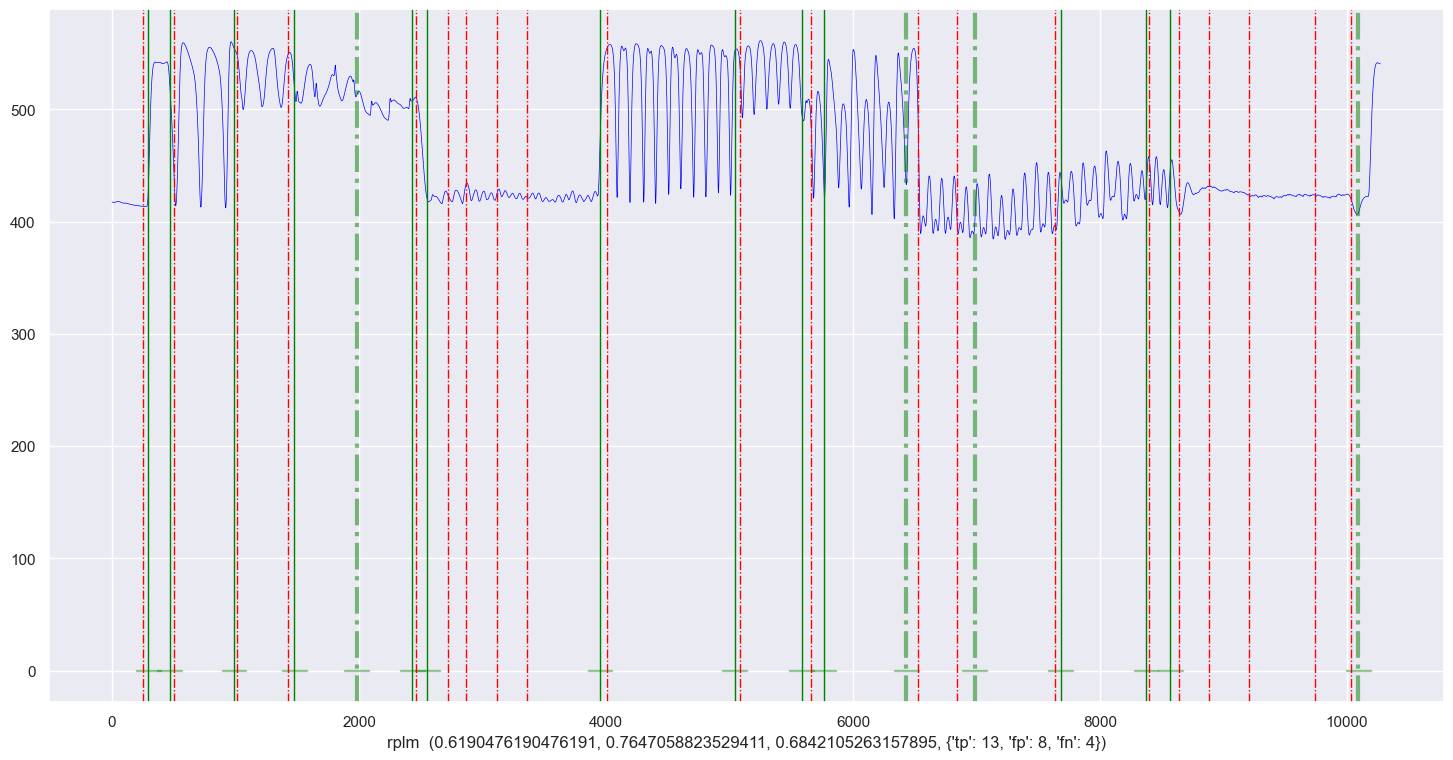

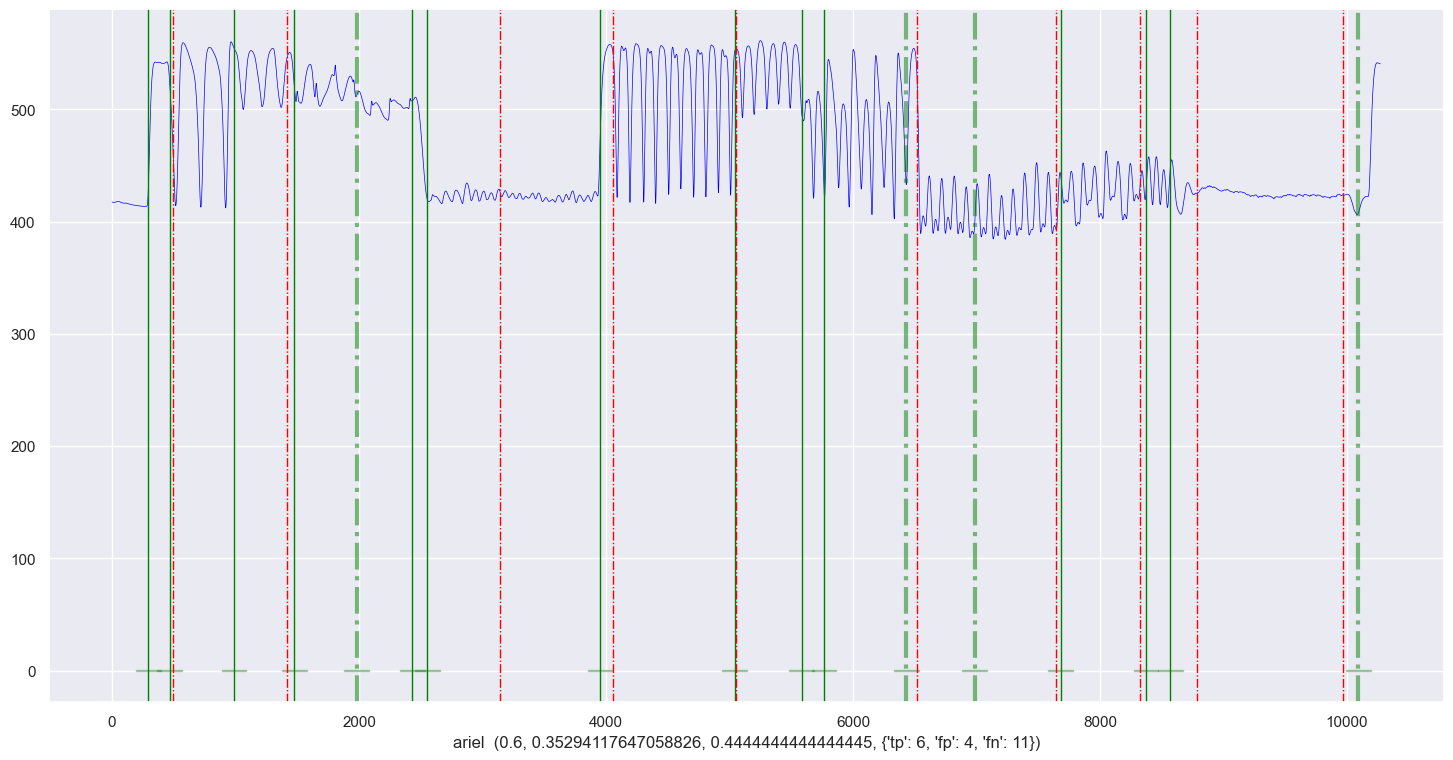

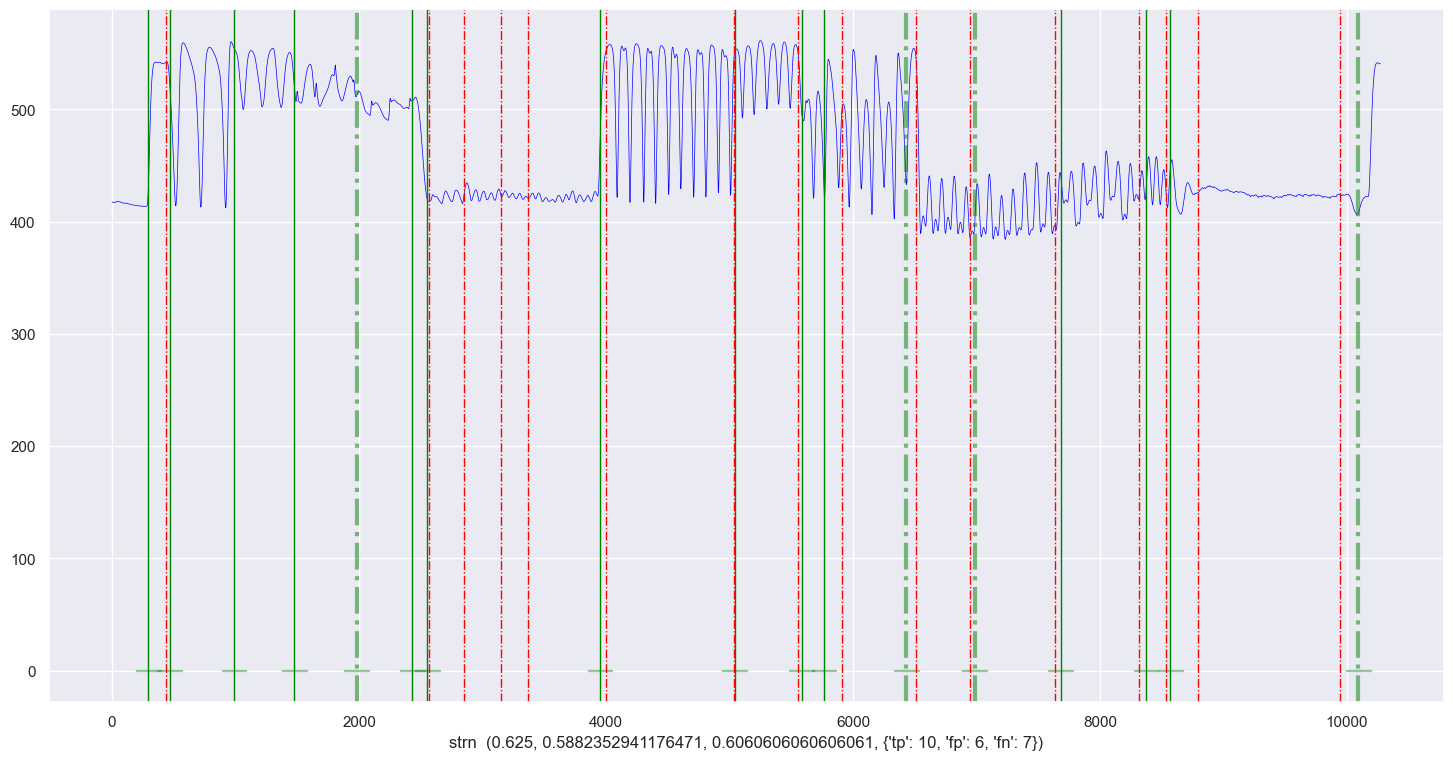

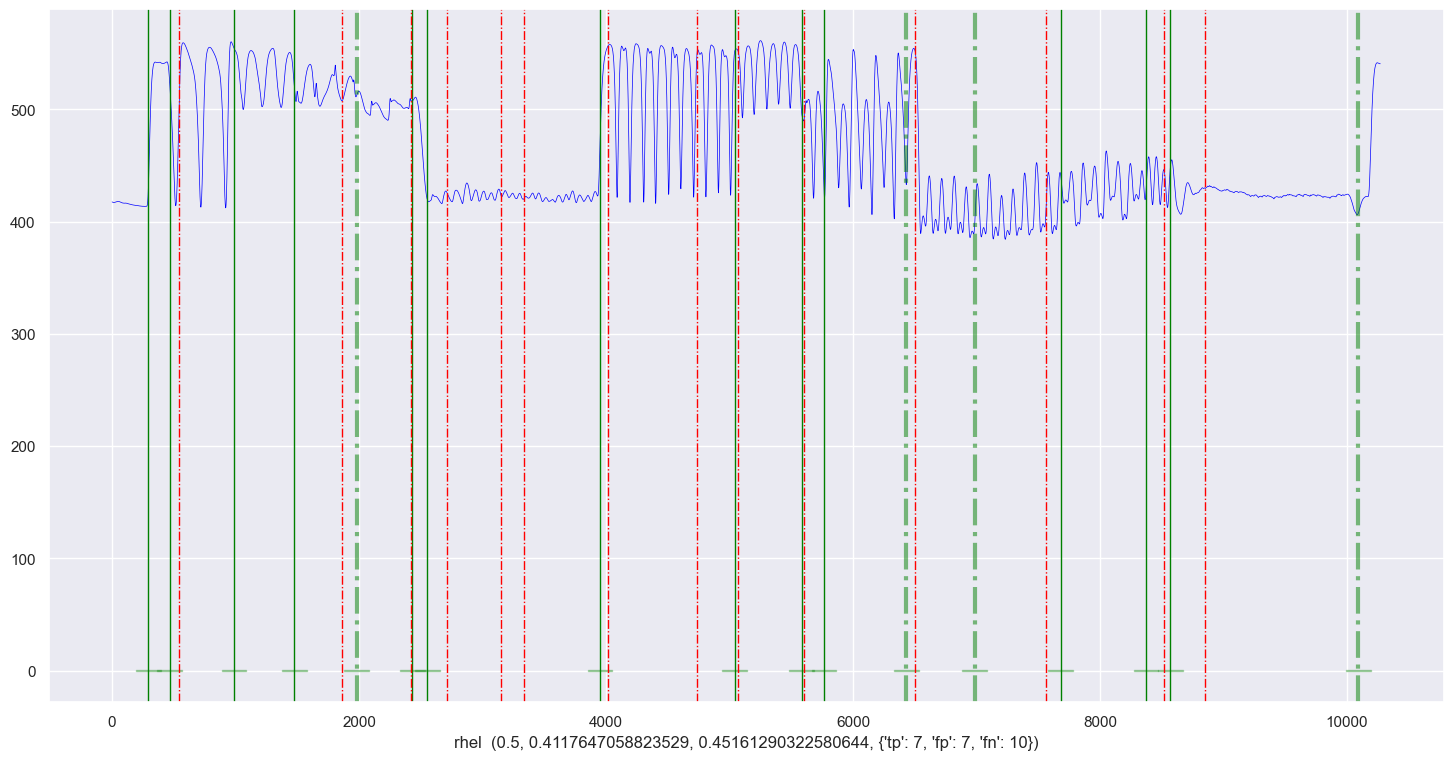

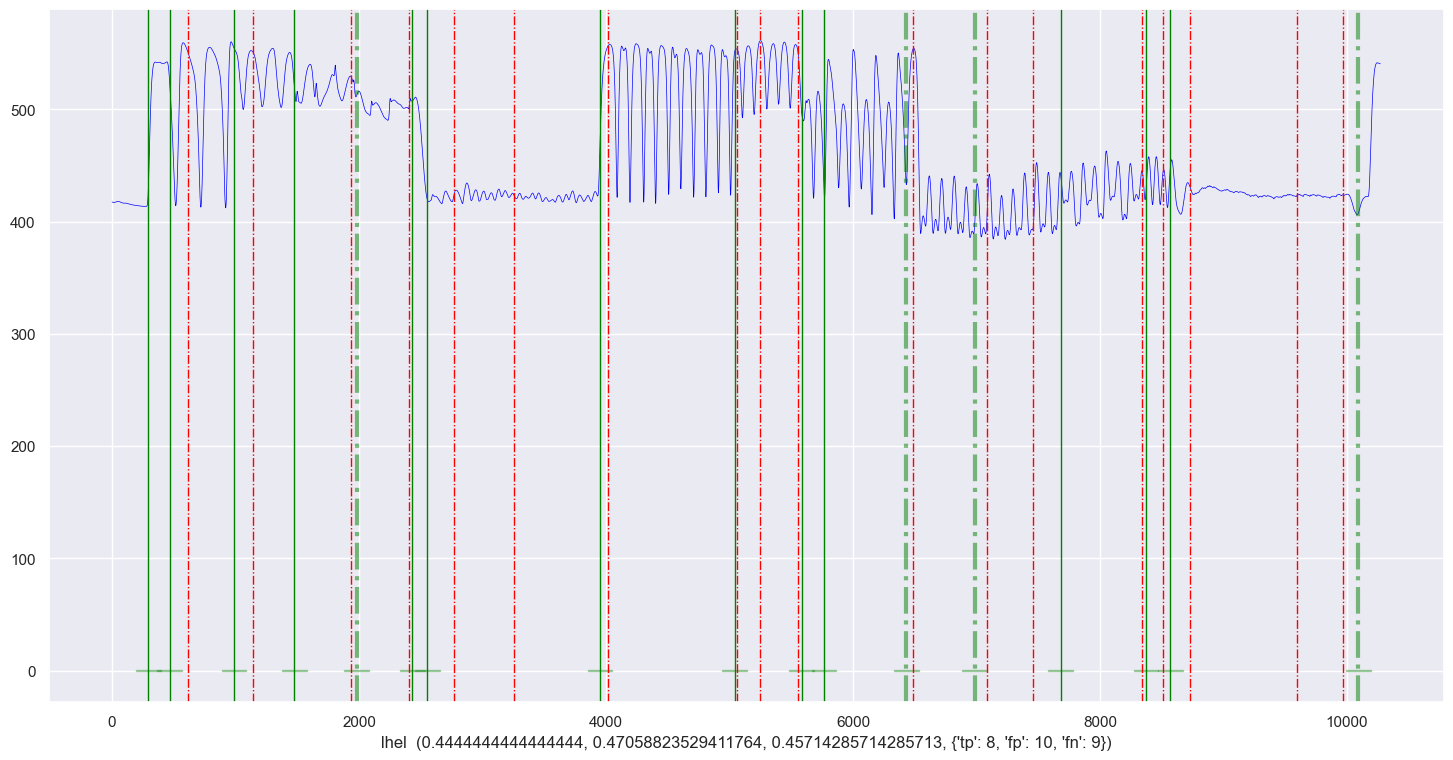

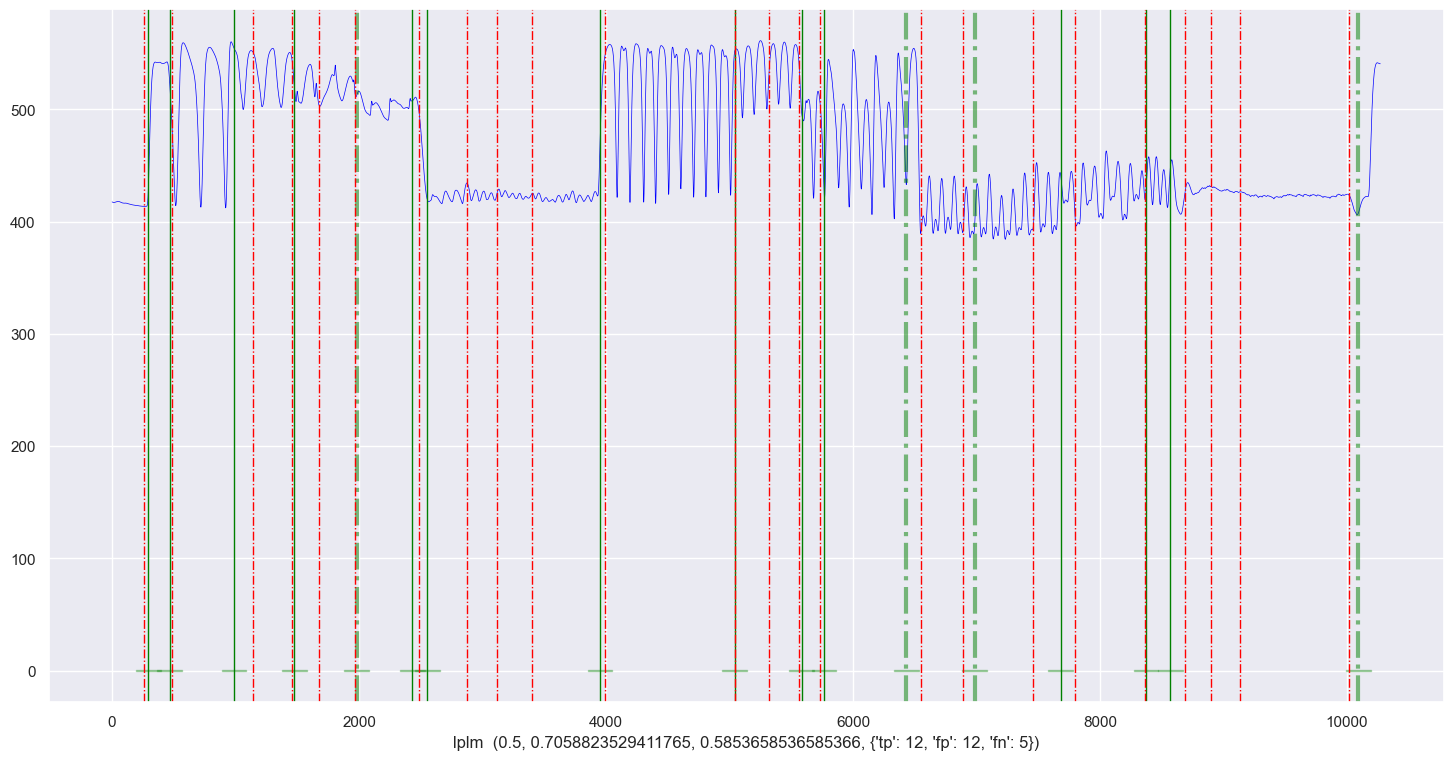

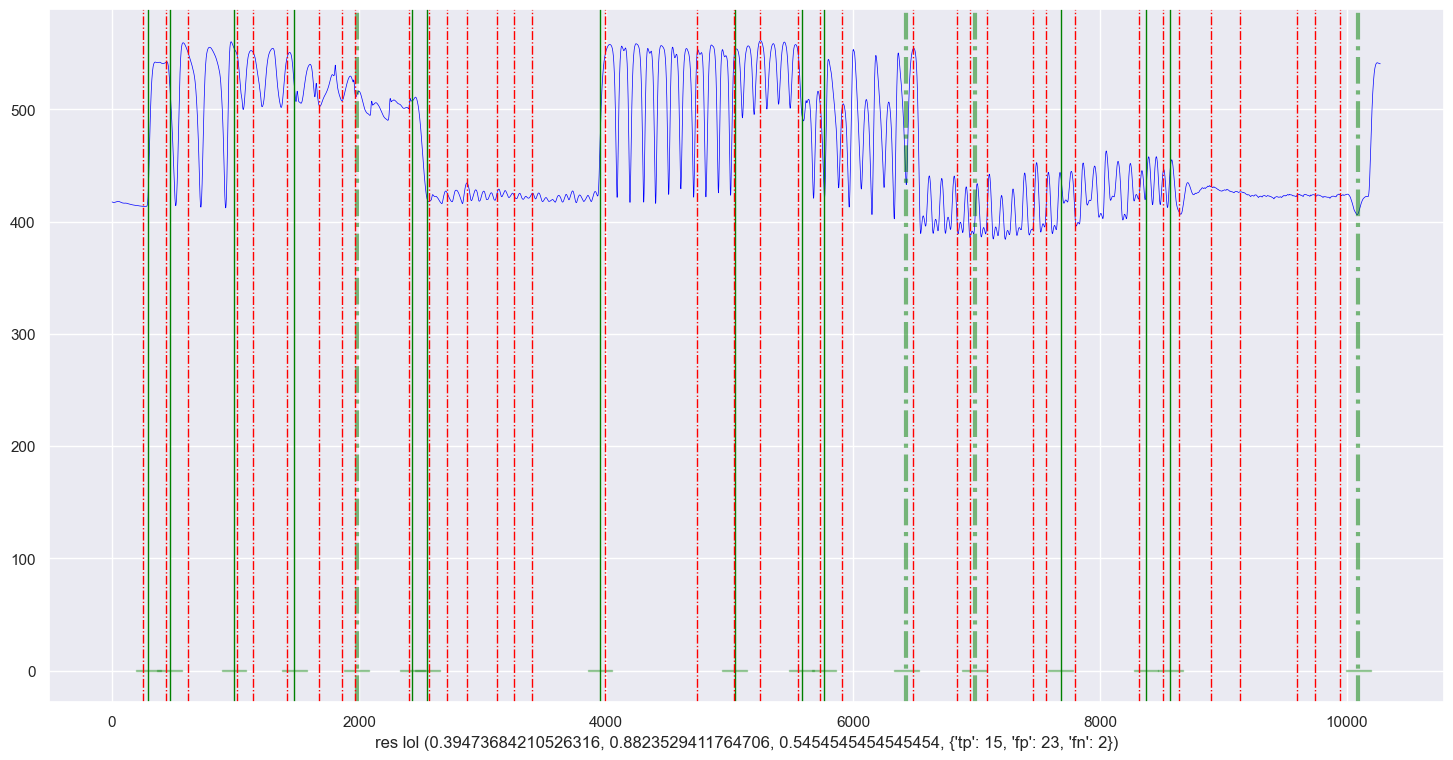

In [135]:
#pack=[cps[74],cps[75],cps[76],cps[77]]
#a4_1=AndSal(100,1,*pack)
df=dfl[3]
gt=gtl[3]
cps=cpsl[3]

#RPLM7,13,23,25)
rplm=ComputeSaliency("rplm",[74,75,76,77,78,79,80,81,82,83,84,85],7,13,23,25)
#ARIEL
ariel=ComputeSaliency("ariel",[26,27,28,29,30,31,32,33,34,35,36,37],2,8,14)
#STRN
strn=ComputeSaliency("strn",[38,39,40,41,42,43,44,45,46,47,48,49],1,9)
#RHEL
rhel=ComputeSaliency("rhel",[50,51,52,53,54,55,56,57,58,59,60,61],7,11,18,21)
#LHEL
lhel=ComputeSaliency("lhel",[62,63,64,65,66,67,68,69,70,71,72,73],6,10,19,20)
#LPLM
lplm=ComputeSaliency("lplm",[86,87,88,89,90,91,92,93,94,95,96,97],4,12,22,24)

result=np.array([])
result=np.append(result,ariel).flatten()
result=np.append(result,strn).flatten()
result=np.append(result,rhel).flatten()
result=np.append(result,lhel).flatten()
result=np.append(result,rplm).flatten()
result=np.append(result,lplm).flatten()
result=np.sort(result)
result=IgnoreZone(3,result,gt)
result=delnear(result,100)
PlotResult(df,gt,result,"res",100,"lol")




def ComputeTable(vel,acc,jerk):
    for i in range(3,4):#len(timeseries)):
        df=ReadAndPreProcess(timeseries[i])
        gt=LoadingGroundTruth(df,groundtruth[i])
        

        vel_4=Test_All4(df,gt,vel,"braccio_dx",i)
        vel_3to1=Test_3_to_1(df,gt,[vel[0]],vel[1:],"braccio_dx",i)

        acc_4=Test_All4(df,gt,acc,"braccio_dx",i)
        acc_3to1=Test_3_to_1(df,gt,[acc[0]],acc[1:],"braccio_dx",i)

        jerk_4=Test_All4(df,gt,jerk,"braccio_dx",i)
        jerk_3to1=Test_3_to_1(df,gt,[jerk[0]],jerk[1:],"braccio_dx",i)

        vel_score=[]
        acc_score=[]
        jerk_score=[]
        vaj_score=[]
        vel3_score=[]
        acc3_score=[]
        jerk3_score=[]
        vel3_1_score=[]
        vel3_2_score=[]
        acc3_1_score=[]
        acc3_2_score=[]
        jerk3_1_score=[]
        jerk3_2_score=[]
        vaj_only3=[]
        vaj_final_1=[]
        vaj_final_2=[]
        # calcola score di vel,acc,jerk in base al majority
        for j in range(0,4):
            p,r,f,d=f1scoremargin(gt,vel_4[j],100)
            vel_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,acc_4[j],100)
            acc_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,jerk_4[j],100)
            jerk_score.append([f,d["fp"]])

        # prende i prediction di vel,acc,jerk in base al majority e calcola la somma col majority
        for j in range(1,5):
            vaj_4_raw = np.array([])
            vaj_4_raw = np.sort(np.append(vaj_4_raw,vel_4[j-1]).flatten())
            vaj_4_raw = np.sort(np.append(vaj_4_raw,acc_4[j-1]).flatten())
            vaj_4_raw = np.sort(np.append(vaj_4_raw,jerk_4[j-1]).flatten())
            vaj_score.append([])
            for k in range(1,4):
                vaj_4 = MajorityVoteCP(vaj_4_raw,100,k)
                p,r,f,d=f1scoremargin(gt,vaj_4,100)
                vaj_score[j-1].append([f,d["fp"]])
                #PlotResult(df,gt,vaj_4,timeseries[i],100,"vaj_4 riga:"+str(j)+"maj:"+str(k))
        # prendo i singoli prediction solo con components senza magnitude e calcolo f1score
        for j in range(0,3):
            p,r,f,d=f1scoremargin(gt,vel_3to1[0][j],100)
            vel3_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,acc_3to1[0][j],100)
            acc3_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,jerk_3to1[0][j],100)
            jerk3_score.append([f,d["fp"]])

        #3+1
        for j in range(0,3):
            p,r,f,d=f1scoremargin(gt,vel_3to1[1][j][0],100)
            vel3_1_score.append([f,d["fp"]])
            p,r,f,d=f1scoremargin(gt,vel_3to1[1][j][1],100)
            vel3_2_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,acc_3to1[1][j][0],100)
            acc3_1_score.append([f,d["fp"]])
            p,r,f,d=f1scoremargin(gt,acc_3to1[1][j][1],100)
            acc3_2_score.append([f,d["fp"]])

            p,r,f,d=f1scoremargin(gt,jerk_3to1[1][j][0],100)
            jerk3_1_score.append([f,d["fp"]])
            p,r,f,d=f1scoremargin(gt,jerk_3to1[1][j][1],100)
            jerk3_2_score.append([f,d["fp"]])



        for j in range(1,4):
            vaj_3to1_raw = np.array([])
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,vel_3to1[0][j-1]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,acc_3to1[0][j-1]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,jerk_3to1[0][j-1]).flatten())
            vaj_only3.append([])
            for k in range(1,4):
                vaj_3to1 = MajorityVoteCP(vaj_3to1_raw,100,k)
                p,r,f,d=f1scoremargin(gt,vaj_3to1,100)
                vaj_only3[j-1].append([f,d["fp"]])
                #PlotResult(df,gt,vaj_3to1,timeseries[i],100,"vaj_3to1_raw riga:"+str(j)+"maj:"+str(k))

        for j in range(1,4):
            vaj_3to1_raw = np.array([])
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,vel_3to1[1][j-1][0]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,acc_3to1[1][j-1][0]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,jerk_3to1[1][j-1][0]).flatten())
            vaj_final_1.append([])
            for k in range(1,4):
                vaj_3to1 = MajorityVoteCP(vaj_3to1_raw,100,k)
                p,r,f,d=f1scoremargin(gt,vaj_3to1,100)
                vaj_final_1[j-1].append([f,d["fp"]])
                #PlotResult(df,gt,vaj_3to1,timeseries[i],100,"vaj_3to1_1 riga:"+str(j)+"maj:"+str(k))

        for j in range(1,4):
            vaj_3to1_raw = np.array([])
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,vel_3to1[1][j-1][1]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,acc_3to1[1][j-1][1]).flatten())
            vaj_3to1_raw = np.sort(np.append(vaj_3to1_raw,jerk_3to1[1][j-1][1]).flatten())
            vaj_final_2.append([])
            for k in range(1,4):
                vaj_3to1 = MajorityVoteCP(vaj_3to1_raw,100,k)
                p,r,f,d=f1scoremargin(gt,vaj_3to1,100)
                vaj_final_2[j-1].append([f,d["fp"]])
                #PlotResult(df,gt,vaj_3to1,timeseries[i],100,"vaj_3to1_2 riga:"+str(j)+"maj:"+str(k))

 
    return [vel_score,acc_score,jerk_score,vaj_score,vel3_score,acc3_score,jerk3_score,vaj_only3,vel3_1_score,vel3_2_score,acc3_1_score,acc3_2_score,jerk3_1_score,jerk3_2_score,vaj_final_1,vaj_final_2]

ariel_v,ariel_a,ariel_j,ariel_vaj,ariel_v3,ariel_a3,ariel_j3,ariel_only,ariel_v3_1,ariel_v3_2,ariel_a3_1,ariel_a3_2,ariel_j3_1,ariel_j3_2,ariel_1,ariel_2=ComputeTable([26,27,28,29],[30,31,32,33],[34,35,36,37])
strn_v,strn_a,strn_j,strn_vaj,strn_v3,strn_a3,strn_j3,strn_only,strn_v3_1,strn_v3_2,strn_a3_1,strn_a3_2,strn_j3_1,strn_j3_2,strn_1,strn_2=ComputeTable([38,39,40,41],[42,43,44,45],[46,47,48,49])
rhel_v,rhel_a,rhel_j,rhel_vaj,rhel_v3,rhel_a3,rhel_j3,rhel_only,rhel_v3_1,rhel_v3_2,rhel_a3_1,rhel_a3_2,rhel_j3_1,rhel_j3_2,rhel_1,rhel_2=ComputeTable([50,51,52,53],[54,55,56,57],[58,59,60,61])
lhel_v,lhel_a,lhel_j,lhel_vaj,lhel_v3,lhel_a3,lhel_j3,lhel_only,lhel_v3_1,lhel_v3_2,lhel_a3_1,lhel_a3_2,lhel_j3_1,lhel_j3_2,lhel_1,lhel_2=ComputeTable([62,63,64,65],[66,67,68,69],[70,71,72,73])
rplm_v,rplm_a,rplm_j,rplm_vaj,rplm_v3,rplm_a3,rplm_j3,rplm_only,rplm_v3_1,rplm_v3_2,rplm_a3_1,rplm_a3_2,rplm_j3_1,rplm_j3_2,rplm_1,rplm_2=ComputeTable([74,75,76,77],[78,79,80,81],[82,83,84,85])
lplm_v,lplm_a,lplm_j,lplm_vaj,lplm_v3,lplm_a3,lplm_j3,lplm_only,lplm_v3_1,lplm_v3_2,lplm_a3_1,lplm_a3_2,lplm_j3_1,lplm_j3_2,lplm_1,lplm_2=ComputeTable([86,87,88,89],[90,91,92,93],[94,95,96,97])

outdf=pd.DataFrame()
outdf["ariel_v"]=ariel_v
outdf["ariel_a"]=ariel_a
outdf["ariel_j"]=ariel_j
outdf.to_excel("outputFile/ariel1.xlsx")
outdf=pd.DataFrame()
outdf["ariel_vaj"]=ariel_vaj
outdf.to_excel("outputFile/ariel2.xlsx")
outdf=pd.DataFrame()
outdf["ariel_v3"]=ariel_v3
outdf["ariel_a3"]=ariel_a3
outdf["ariel_j3"]=ariel_j3
outdf.to_excel("outputFile/ariel3.xlsx")
outdf=pd.DataFrame()
outdf["ariel_only"]=ariel_only
outdf.to_excel("outputFile/ariel4.xlsx")
outdf=pd.DataFrame()
outdf["ariel_1"]=ariel_1
outdf["ariel_2"]=ariel_2
outdf.to_excel("outputFile/ariel5.xlsx")
outdf=pd.DataFrame()
outdf["ariel_v3_1"]=ariel_v3_1
outdf["ariel_v3_2"]=ariel_v3_2
outdf["ariel_a3_1"]=ariel_a3_1
outdf["ariel_a3_2"]=ariel_a3_2
outdf["ariel_j3_1"]=ariel_j3_1
outdf["ariel_j3_2"]=ariel_j3_2
outdf.to_excel("outputFile/ariel6.xlsx")

outdf=pd.DataFrame()
outdf["strn_v"]=strn_v
outdf["strn_a"]=strn_a
outdf["strn_j"]=strn_j
outdf.to_excel("outputFile/strn1.xlsx")
outdf=pd.DataFrame()
outdf["strn_vaj"]=strn_vaj
outdf.to_excel("outputFile/strn2.xlsx")
outdf=pd.DataFrame()
outdf["strn_v3"]=strn_v3
outdf["strn_a3"]=strn_a3
outdf["strn_j3"]=strn_j3
outdf.to_excel("outputFile/strn3.xlsx")
outdf=pd.DataFrame()
outdf["strn_only"]=strn_only
outdf.to_excel("outputFile/strn4.xlsx")
outdf=pd.DataFrame()
outdf["strn_1"]=strn_1
outdf["strn_2"]=strn_2
outdf.to_excel("outputFile/strn5.xlsx")
outdf=pd.DataFrame()
outdf["strn_v3_1"]=strn_v3_1
outdf["strn_v3_2"]=strn_v3_2
outdf["strn_a3_1"]=strn_a3_1
outdf["strn_a3_2"]=strn_a3_2
outdf["strn_j3_1"]=strn_j3_1
outdf["strn_j3_2"]=strn_j3_2
outdf.to_excel("outputFile/strn6.xlsx")

outdf=pd.DataFrame()
outdf["rhel_v"]=rhel_v
outdf["rhel_a"]=rhel_a
outdf["rhel_j"]=rhel_j
outdf.to_excel("outputFile/rhel1.xlsx")
outdf=pd.DataFrame()
outdf["rhel_vaj"]=rhel_vaj
outdf.to_excel("outputFile/rhel2.xlsx")
outdf=pd.DataFrame()
outdf["rhel_v3"]=rhel_v3
outdf["rhel_a3"]=rhel_a3
outdf["rhel_j3"]=rhel_j3
outdf.to_excel("outputFile/rhel3.xlsx")
outdf=pd.DataFrame()
outdf["rhel_only"]=rhel_only
outdf.to_excel("outputFile/rhel4.xlsx")
outdf=pd.DataFrame()
outdf["rhel_1"]=rhel_1
outdf["rhel_2"]=rhel_2
outdf.to_excel("outputFile/rhel5.xlsx")
outdf=pd.DataFrame()
outdf["rhel_v3_1"]=rhel_v3_1
outdf["rhel_v3_2"]=rhel_v3_2
outdf["rhel_a3_1"]=rhel_a3_1
outdf["rhel_a3_2"]=rhel_a3_2
outdf["rhel_j3_1"]=rhel_j3_1
outdf["rhel_j3_2"]=rhel_j3_2
outdf.to_excel("outputFile/rhel6.xlsx")

outdf=pd.DataFrame()
outdf["lhel_v"]=lhel_v
outdf["lhel_a"]=lhel_a
outdf["lhel_j"]=lhel_j
outdf.to_excel("outputFile/lhel1.xlsx")
outdf=pd.DataFrame()
outdf["lhel_vaj"]=lhel_vaj
outdf.to_excel("outputFile/lhel2.xlsx")
outdf=pd.DataFrame()
outdf["lhel_v3"]=lhel_v3
outdf["lhel_a3"]=lhel_a3
outdf["lhel_j3"]=lhel_j3
outdf.to_excel("outputFile/lhel3.xlsx")
outdf=pd.DataFrame()
outdf["lhel_only"]=lhel_only
outdf.to_excel("outputFile/lhel4.xlsx")
outdf=pd.DataFrame()
outdf["lhel_1"]=lhel_1
outdf["lhel_2"]=lhel_2
outdf.to_excel("outputFile/lhel5.xlsx")
outdf=pd.DataFrame()
outdf["lhel_v3_1"]=lhel_v3_1
outdf["lhel_v3_2"]=lhel_v3_2
outdf["lhel_a3_1"]=lhel_a3_1
outdf["lhel_a3_2"]=lhel_a3_2
outdf["lhel_j3_1"]=lhel_j3_1
outdf["lhel_j3_2"]=lhel_j3_2
outdf.to_excel("outputFile/lhel6.xlsx")

outdf=pd.DataFrame()
outdf["rplm_v"]=rplm_v
outdf["rplm_a"]=rplm_a
outdf["rplm_j"]=rplm_j
outdf.to_excel("outputFile/rplm1.xlsx")
outdf=pd.DataFrame()
outdf["rplm_vaj"]=rplm_vaj
outdf.to_excel("outputFile/rplm2.xlsx")
outdf=pd.DataFrame()
outdf["rplm_v3"]=rplm_v3
outdf["rplm_a3"]=rplm_a3
outdf["rplm_j3"]=rplm_j3
outdf.to_excel("outputFile/rplm3.xlsx")
outdf=pd.DataFrame()
outdf["rplm_only"]=rplm_only
outdf.to_excel("outputFile/rplm4.xlsx")
outdf=pd.DataFrame()
outdf["rplm_1"]=rplm_1
outdf["rplm_2"]=rplm_2
outdf.to_excel("outputFile/rplm5.xlsx")
outdf=pd.DataFrame()
outdf["rplm_v3_1"]=rplm_v3_1
outdf["rplm_v3_2"]=rplm_v3_2
outdf["rplm_a3_1"]=rplm_a3_1
outdf["rplm_a3_2"]=rplm_a3_2
outdf["rplm_j3_1"]=rplm_j3_1
outdf["rplm_j3_2"]=rplm_j3_2
outdf.to_excel("outputFile/rplm6.xlsx")

outdf=pd.DataFrame()
outdf["lplm_v"]=lplm_v
outdf["lplm_a"]=lplm_a
outdf["lplm_j"]=lplm_j
outdf.to_excel("outputFile/lplm1.xlsx")
outdf=pd.DataFrame()
outdf["lplm_vaj"]=lplm_vaj
outdf.to_excel("outputFile/lplm2.xlsx")
outdf=pd.DataFrame()
outdf["lplm_v3"]=lplm_v3
outdf["lplm_a3"]=lplm_a3
outdf["lplm_j3"]=lplm_j3
outdf.to_excel("outputFile/lplm3.xlsx")
outdf=pd.DataFrame()
outdf["lplm_only"]=lplm_only
outdf.to_excel("outputFile/lplm4.xlsx")
outdf=pd.DataFrame()
outdf["lplm_1"]=lplm_1
outdf["lplm_2"]=lplm_2
outdf.to_excel("outputFile/lplm5.xlsx")
outdf=pd.DataFrame()
outdf["lplm_v3_1"]=lplm_v3_1
outdf["lplm_v3_2"]=lplm_v3_2
outdf["lplm_a3_1"]=lplm_a3_1
outdf["lplm_a3_2"]=lplm_a3_2
outdf["lplm_j3_1"]=lplm_j3_1
outdf["lplm_j3_2"]=lplm_j3_2
outdf.to_excel("outputFile/lplm6.xlsx")

cleaned_array = [s[3:-7] for s in timeseries]
outdf = pd.DataFrame({"test_set":[0,2,4,6,8,9]})

for i in range(3,4):#len(timeseries)):
    df=ReadAndPreProcess(timeseries[i])
    gt=LoadingGroundTruth(df,groundtruth[i])
    test_set=[0,2,4,6,8,9]
    outeval=[]
    
    

    #test1
    #braccio dx
    # velocity components
    feature_selected=[74,75,76,77]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    test1_1=MajorityVoteCP(cp,100,1)
    test1_2=MajorityVoteCP(cp,100,2)
    test1_3=MajorityVoteCP(cp,100,3)
    test1_4=MajorityVoteCP(cp,100,4)
    PlotResult(df,gt,cp,timeseries[i],100,"test1 raw")
    PlotResult(df,gt,test1_1,timeseries[i],100,"test1_1")
    PlotResult(df,gt,test1_2,timeseries[i],100,"test1_2")
    PlotResult(df,gt,test1_3,timeseries[i],100,"test1_3")
    PlotResult(df,gt,test1_4,timeseries[i],100,"test1_4")

    #test2
    feature_selected=[75,76,77]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    test2_1=MajorityVoteCP(cp,100,1)
    test2_2=MajorityVoteCP(cp,100,2)
    test2_3=MajorityVoteCP(cp,100,3)

    feature_selected=[74]
    cp,eachcp,clasp=GetClasp2(df,gt,0,feature_selected, window_size="suss",distance="euclidean_distance",excl_radius=4,n_jobs=8)
    test2_4=np.array([])
    test2_4 = np.sort(np.append(cp,test2_1).flatten())
    test2_4_1 = MajorityVoteCP(test2_4,100,1)
    test2_4_2 = MajorityVoteCP(test2_4,100,2)

    test2_5=np.array([])
    test2_5 = np.sort(np.append(cp,test2_2).flatten())
    test2_5_1 = MajorityVoteCP(test2_5,100,1)
    test2_5_2 = MajorityVoteCP(test2_5,100,2)

    test2_6=np.array([])
    test2_6 = np.sort(np.append(cp,test2_3).flatten())
    test2_6_1 = MajorityVoteCP(test2_6,100,1)
    test2_6_2 = MajorityVoteCP(test2_6,100,2)

    PlotResult(df,gt,test2_1,timeseries[i],100,"test_2_1")
    PlotResult(df,gt,test2_2,timeseries[i],100,"test2_2")
    PlotResult(df,gt,test2_3,timeseries[i],100,"test2_3")

    PlotResult(df,gt,cp,timeseries[i],100,"cp")
    PlotResult(df,gt,test2_1,timeseries[i],100,"test_2_1")
    PlotResult(df,gt,test2_4_1,timeseries[i],100,"test2_4_1")
    PlotResult(df,gt,test2_4_2,timeseries[i],100,"test2_4_2")

    PlotResult(df,gt,cp,timeseries[i],100,"cp")
    PlotResult(df,gt,test2_2,timeseries[i],100,"test2_2")
    PlotResult(df,gt,test2_5_1,timeseries[i],100,"test2_5_1")
    PlotResult(df,gt,test2_5_2,timeseries[i],100,"test2_5_2")

    PlotResult(df,gt,cp,timeseries[i],100,"cp")
    PlotResult(df,gt,test2_3,timeseries[i],100,"test2_3")
    PlotResult(df,gt,test2_6_1,timeseries[i],100,"test2_6_1")
    PlotResult(df,gt,test2_6_2,timeseries[i],100,"test2_6_2")

    

    
    #braccio_dx.append(IgnoreZone(i,np.array(MajorityVoteCP(cp,100,j)).astype(int),gt))
       


    

    #cp=IgnoreZone(i,cp,gt)
    #cp=delnear(cp,100)

      